# Урок 2. Keras

ЗАДАНИЕ 1

Попробуйте обучить, нейронную сеть на Keras(рассмотренную на уроке) на датасете MNIST с другими параметрами. 
Опишите в комментарии к уроку - какой результата вы добились от нейросети? Что помогло вам улучшить ее точность?  
   

In [1]:
# The full neural network code!
###############################
import numpy as np
import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))


Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
def create_model(train_images, train_labels, test_images,test_labels,layers,list_keys,optimizer_par,loss_par,
                 metrics_par,epochs_par,batch_size_par):
    
    # Build the model.        
    model = Sequential()
    
    for i in list_keys:
        if len(layers[i])==3:
            model.add(Dense(layers[i][0], activation=layers[i][1], input_shape=(layers[i][2],)))
        elif len(layers[i])==2:
            model.add(Dense(layers[i][0], activation=layers[i][1]))
        else:
             raise Exception("layers shape exception")
            
            
     
    # Compile the model.
    model.compile(
      optimizer=optimizer_par,
      loss=loss_par,
      metrics=metrics_par,
    )

    # Train the model.
    hist=model.fit(
      train_images,
      to_categorical(train_labels),
      epochs=epochs_par,
      batch_size=batch_size_par,
    )

    # Evaluate the model.
    model.evaluate(
      test_images,
      to_categorical(test_labels)
    )

    # Save the model to disk.
    model.save_weights('model.h5')

    # Load the model from disk later using:
    # model.load_weights('model.h5')
    
    return model,hist

In [4]:
#изменение количества внутренних слоев

def accuracies_from_inner_layers_counts(inner_layers_counts):
    accuracies=[]    
    for i in inner_layers_counts:
        layers = {1: [64,'relu',test_images.shape[1]]}
        j=0
        while j<i:  
            layers[j+2]=[64,'relu']
            j += 1
        
        layers[j+2]=[10,'softmax']
            
        list_keys = list(layers.keys())
        list_keys.sort()
        model,hist=create_model(train_images, train_labels, test_images,test_labels,layers,list_keys,
                                optimizer_par='adam',loss_par='categorical_crossentropy',metrics_par=['accuracy'],
                                epochs_par=5,batch_size_par=32)

        # Predict on the first 5 test images.
        predictions = model.predict(test_images[:5])
    
        accuracies.append(hist.history.get('accuracy')[-1])

        # Print our model's predictions.
        #print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

        # Check our predictions against the ground truths.
        #print(test_labels[:5]) # [7, 2, 1, 0, 4]
        
    return accuracies
    




In [7]:
inner_layers_counts=[0,1,2,3,4,5,6,7,8,9,10,11]
accuracies=accuracies_from_inner_layers_counts(inner_layers_counts)
print(accuracies)


Epoch 1/5
60000/60000 [==============================] - 2s 26us/step - loss: 0.3988 - accuracy: 0.8833
Epoch 2/5
60000/60000 [==============================] - 2s 25us/step - loss: 0.2801 - accuracy: 0.9197
Epoch 3/5
60000/60000 [==============================] - 2s 25us/step - loss: 0.2370 - accuracy: 0.9328
Epoch 4/5
60000/60000 [==============================] - 2s 25us/step - loss: 0.2028 - accuracy: 0.9420
Epoch 5/5
10000/10000 [==============================] - 0s 17us/step
Epoch 1/5
60000/60000 [==============================] - 2s 28us/step - loss: 0.3761 - accuracy: 0.8882
Epoch 2/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.2369 - accuracy: 0.9294
Epoch 3/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.1928 - accuracy: 0.9420
Epoch 4/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.1644 - accuracy: 0.9502
Epoch 5/5
10000/10000 [==============================] - 0s 16us/step
Epoch 1/5
60000/60000 [=====

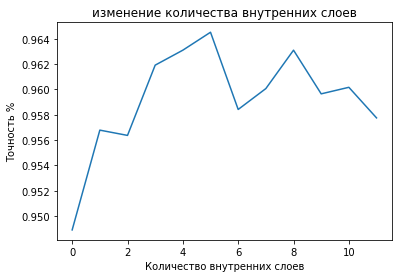

In [8]:
plt.plot(inner_layers_counts,accuracies)
plt.title("изменение количества внутренних слоев")
plt.xlabel('Количество внутренних слоев')
plt.ylabel('Точность %')
plt.show()

**Вывод: при увеличении количества внутренних слоев от 0 до 5 точность увеличивается, затем немного уменьшается и далее увеличивается при увеличении количества внутренних слоев от 6 до 8 и далее уменьшается вероятно из-за насыщения.
Т.о. здесь наилучшее число слоев=5**

In [11]:
#изменение количества нейронов слоев
def accuracies_from_neuron_counts(inner_neuron_counts):
    accuracies=[]    
    for i in inner_neuron_counts:
        layers = {1: [i,'relu',test_images.shape[1]],2: [i,'relu'],3: [i,'relu'],4: [i,'relu'],
                  5: [i,'relu'],6: [i,'relu'],7:[10,'softmax']}
        
                            
        list_keys = list(layers.keys())
        list_keys.sort()
        model,hist=create_model(train_images, train_labels, test_images,test_labels,layers,list_keys,
                                optimizer_par='adam',loss_par='categorical_crossentropy',metrics_par=['accuracy'],
                                epochs_par=5,batch_size_par=32)

        # Predict on the first 5 test images.
        predictions = model.predict(test_images[:5])
    
        accuracies.append(hist.history.get('accuracy')[-1])

        # Print our model's predictions.
        #print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

        # Check our predictions against the ground truths.
        #print(test_labels[:5]) # [7, 2, 1, 0, 4]
        
    return accuracies


In [12]:
neuron_counts=[64,128,512,1024]
accuracies=accuracies_from_neuron_counts(neuron_counts)
print(accuracies)

Epoch 1/5
60000/60000 [==============================] - 2s 34us/step - loss: 0.3618 - accuracy: 0.8857
Epoch 2/5
60000/60000 [==============================] - 2s 32us/step - loss: 0.1966 - accuracy: 0.9384
Epoch 3/5
60000/60000 [==============================] - 2s 32us/step - loss: 0.1592 - accuracy: 0.9503
Epoch 4/5
60000/60000 [==============================] - 2s 33us/step - loss: 0.1364 - accuracy: 0.9577
Epoch 5/5
10000/10000 [==============================] - 0s 45us/step
Epoch 1/5
60000/60000 [==============================] - 3s 49us/step - loss: 0.3083 - accuracy: 0.9008
Epoch 2/5
60000/60000 [==============================] - 3s 47us/step - loss: 0.1495 - accuracy: 0.9543
Epoch 3/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.1161 - accuracy: 0.9648
Epoch 4/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.0992 - accuracy: 0.9686
Epoch 5/5
10000/10000 [==============================] - 0s 21us/step
Epoch 1/5
60000/60000 [=====

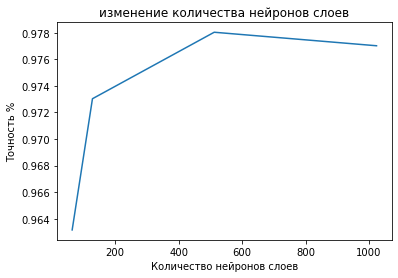

In [13]:
plt.plot(neuron_counts,accuracies)
plt.title("изменение количества нейронов слоев")
plt.xlabel('Количество нейронов слоев')
plt.ylabel('Точность %')
plt.show()

**Вывод: при увеличении количества нейронов в слоях сети от 64 до 512 точность увеличивается, затем немного уменьшается и остается примерно постоянной при увеличении нейронов в слоях сети от 512 и более немного уменьшаясь из-за насыщения.
Т.о. здесь наилучшее число нейронов=512**

In [19]:
#изменяем optimizer - позволяет задать алгоритм, который будет осуществлять изменения весов по всей нейронной сети (backpropagation)

def accuracies_from_optimizers(optimizers):
    accuracies=[] 
    layers = {1: [512,'relu',test_images.shape[1]],2: [512,'relu'],3: [512,'relu'],4: [512,'relu'],
                  5: [512,'relu'],6: [512,'relu'],7:[10,'softmax']}
    for optimizer in optimizers:
        list_keys = list(layers.keys())
        list_keys.sort()
        model,hist=create_model(train_images, train_labels, test_images,test_labels,layers,list_keys,
                                optimizer_par=optimizer,loss_par='categorical_crossentropy',metrics_par=['accuracy'],
                                epochs_par=5,batch_size_par=32)

        # Predict on the first 5 test images.
        predictions = model.predict(test_images[:5])
    
        accuracies.append(hist.history.get('accuracy')[-1])

        # Print our model's predictions.
        #print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

        # Check our predictions against the ground truths.
        #print(test_labels[:5]) # [7, 2, 1, 0, 4]
        
    return accuracies

    

In [20]:
optimizers=['SGD','rmsprop','adam','adadelta','adagrad','adamax','nadam','ftrl']
accuracies=accuracies_from_optimizers(optimizers)
print(accuracies)

Epoch 1/5
60000/60000 [==============================] - 9s 154us/step - loss: 0.6145 - accuracy: 0.8177
Epoch 2/5
60000/60000 [==============================] - 9s 154us/step - loss: 0.2317 - accuracy: 0.9296
Epoch 3/5
60000/60000 [==============================] - 9s 154us/step - loss: 0.1682 - accuracy: 0.9483
Epoch 4/5
60000/60000 [==============================] - 9s 154us/step - loss: 0.1307 - accuracy: 0.9604
Epoch 5/5
10000/10000 [==============================] - 1s 64us/step
Epoch 1/5
60000/60000 [==============================] - 9s 154us/step - loss: nan - accuracy: 0.0987
Epoch 2/5
60000/60000 [==============================] - 9s 153us/step - loss: nan - accuracy: 0.0987
Epoch 3/5
60000/60000 [==============================] - 10s 164us/step - loss: nan - accuracy: 0.0987
Epoch 4/5
60000/60000 [==============================] - 9s 153us/step - loss: nan - accuracy: 0.0987
Epoch 5/5
10000/10000 [==============================] - 0s 47us/step
Epoch 1/5
60000/60000 [========

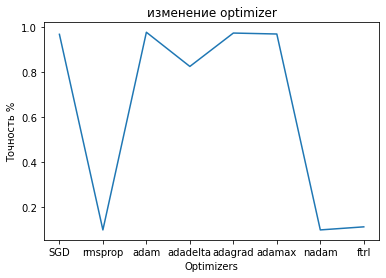

In [21]:
plt.plot(optimizers,accuracies)
plt.title("изменение optimizer")
plt.xlabel('Optimizers')
plt.ylabel('Точность %')
plt.show()

**Вывод: Наибольшее значение точности - для optimizer='SGD','adam','adagrad','adamax'**

In [23]:
#изменяем количество эпох - итераций обучения
def accuracies_from_epochs(epochs):
    accuracies=[] 
    layers = {1: [512,'relu',test_images.shape[1]],2: [512,'relu'],3: [512,'relu'],4: [512,'relu'],
                  5: [512,'relu'],6: [512,'relu'],7:[10,'softmax']}
    for epoch in epochs:
        list_keys = list(layers.keys())
        list_keys.sort()
        model,hist=create_model(train_images, train_labels, test_images,test_labels,layers,list_keys,
                                optimizer_par='adam',loss_par='categorical_crossentropy',metrics_par=['accuracy'],
                                epochs_par=epoch,batch_size_par=32)

        # Predict on the first 5 test images.
        predictions = model.predict(test_images[:5])
    
        accuracies.append(hist.history.get('accuracy')[-1])

        # Print our model's predictions.
        #print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

        # Check our predictions against the ground truths.
        #print(test_labels[:5]) # [7, 2, 1, 0, 4]
        
    return accuracies



In [24]:
epochs=[3,5,7,9,12]
accuracies=accuracies_from_epochs(epochs)
print(accuracies)

Epoch 1/3
60000/60000 [==============================] - 11s 177us/step - loss: 0.2933 - accuracy: 0.9090
Epoch 2/3
60000/60000 [==============================] - 11s 177us/step - loss: 0.1342 - accuracy: 0.9600
Epoch 3/3
10000/10000 [==============================] - 1s 51us/step
Epoch 1/5
60000/60000 [==============================] - 10s 174us/step - loss: 0.2898 - accuracy: 0.9110
Epoch 2/5
60000/60000 [==============================] - 11s 175us/step - loss: 0.1330 - accuracy: 0.9599
Epoch 3/5
60000/60000 [==============================] - 11s 175us/step - loss: 0.1008 - accuracy: 0.9694
Epoch 4/5
60000/60000 [==============================] - 11s 177us/step - loss: 0.0827 - accuracy: 0.9750
Epoch 5/5
10000/10000 [==============================] - 0s 47us/step
Epoch 1/7
60000/60000 [==============================] - 11s 179us/step - loss: 0.2922 - accuracy: 0.9096
Epoch 2/7
60000/60000 [==============================] - 11s 179us/step - loss: 0.1358 - accuracy: 0.9588
Epoch 3/7
60

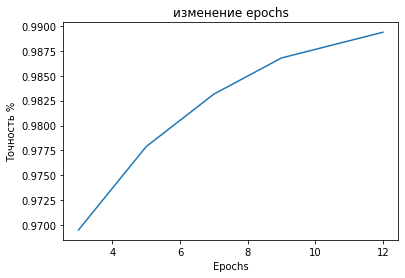

In [25]:
plt.plot(epochs,accuracies)
plt.title("изменение epochs")
plt.xlabel('Epochs')
plt.ylabel('Точность %')
plt.show()

**Вывод: C увеличением количества эпох (определяет сколько раз через нейросеть должен пройти весь набор данных) увеличивается точность**

In [29]:
#изменяем bath_size - определяет количество обучающих примеров передающихся нейросети на каждой итерации обучения
def accuracies_from_bath_sizes(bath_sizes):
    accuracies=[] 
    layers = {1: [512,'relu',test_images.shape[1]],2: [512,'relu'],3: [512,'relu'],4: [512,'relu'],
                  5: [512,'relu'],6: [512,'relu'],7:[10,'softmax']}
    for bath_size in bath_sizes:
        list_keys = list(layers.keys())
        list_keys.sort()
        model,hist=create_model(train_images, train_labels, test_images,test_labels,layers,list_keys,
                                optimizer_par='adam',loss_par='categorical_crossentropy',metrics_par=['accuracy'],
                                epochs_par=12,batch_size_par=bath_size)

        # Predict on the first 5 test images.
        predictions = model.predict(test_images[:5])
    
        accuracies.append(hist.history.get('accuracy')[-1])

        # Print our model's predictions.
        #print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

        # Check our predictions against the ground truths.
        #print(test_labels[:5]) # [7, 2, 1, 0, 4]
        
    return accuracies



In [30]:
bath_sizes=[16,32,64,128]
accuracies=accuracies_from_bath_sizes(bath_sizes)
print(accuracies)

Epoch 1/12
60000/60000 [==============================] - 18s 300us/step - loss: 0.3123 - accuracy: 0.9055
Epoch 2/12
60000/60000 [==============================] - 18s 297us/step - loss: 0.1490 - accuracy: 0.9560
Epoch 3/12
60000/60000 [==============================] - 18s 298us/step - loss: 0.1181 - accuracy: 0.9658
Epoch 4/12
60000/60000 [==============================] - 19s 309us/step - loss: 0.0975 - accuracy: 0.9713
Epoch 5/12
60000/60000 [==============================] - 18s 306us/step - loss: 0.0817 - accuracy: 0.9763
Epoch 6/12
60000/60000 [==============================] - 18s 308us/step - loss: 0.0728 - accuracy: 0.9783
Epoch 7/12
60000/60000 [==============================] - 19s 310us/step - loss: 0.0634 - accuracy: 0.9811
Epoch 8/12
60000/60000 [==============================] - 20s 338us/step - loss: 0.0582 - accuracy: 0.9819
Epoch 9/12
60000/60000 [==============================] - 20s 330us/step - loss: 0.0526 - accuracy: 0.9833
Epoch 10/12
60000/60000 [============

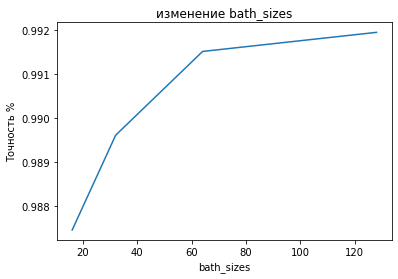

In [31]:
plt.plot(bath_sizes,accuracies)
plt.title("изменение bath_sizes")
plt.xlabel('bath_sizes')
plt.ylabel('Точность %')
plt.show()

**Вывод: C увеличением количества обучающих примеров передающихся нейросети на каждой итерации увеличивается точность  и достигает макимума при bath_size=128 - accuracy=0.992**

In [34]:
def accuracies_for_test_data():
    
    layers = {1: [512,'relu',test_images.shape[1]],2: [512,'relu'],3: [512,'relu'],4: [512,'relu'],
                  5: [512,'relu'],6: [512,'relu'],7:[10,'softmax']}
    
    list_keys = list(layers.keys())
    list_keys.sort()
    model,hist=create_model(train_images, train_labels, test_images,test_labels,layers,list_keys,
                                optimizer_par='adam',loss_par='categorical_crossentropy',metrics_par=['accuracy'],
                                epochs_par=12,batch_size_par=128)

        # Predict on the first 5 test images.
    predictions = model.predict(test_images[:5])
    
    test_loss, test_acc=model.evaluate(
        test_images,
        to_categorical(test_labels)
        )

        # Print our model's predictions.
        #print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

        # Check our predictions against the ground truths.
        #print(test_labels[:5]) # [7, 2, 1, 0, 4]
        
    return test_loss, test_acc

In [35]:
test_loss, test_acc=accuracies_for_test_data()
print('test_loss=',test_loss)
print('test_acc=',test_acc)

Epoch 1/12
60000/60000 [==============================] - 5s 83us/step - loss: 0.3151 - accuracy: 0.9002
Epoch 2/12
60000/60000 [==============================] - 5s 81us/step - loss: 0.1173 - accuracy: 0.9643
Epoch 3/12
60000/60000 [==============================] - 5s 83us/step - loss: 0.0862 - accuracy: 0.9736
Epoch 4/12
60000/60000 [==============================] - 5s 83us/step - loss: 0.0640 - accuracy: 0.9807
Epoch 5/12
60000/60000 [==============================] - 5s 82us/step - loss: 0.0531 - accuracy: 0.9829
Epoch 6/12
60000/60000 [==============================] - 5s 82us/step - loss: 0.0445 - accuracy: 0.9861
Epoch 7/12
60000/60000 [==============================] - 5s 83us/step - loss: 0.0397 - accuracy: 0.9873
Epoch 8/12
60000/60000 [==============================] - 5s 82us/step - loss: 0.0360 - accuracy: 0.9883
Epoch 9/12
60000/60000 [==============================] - 6s 93us/step - loss: 0.0324 - accuracy: 0.9893
Epoch 10/12
60000/60000 [==============================

**Общий вывод: подбирая параметры сети нужным образом удалось добиться достаточно большой точности на тренировочных данных, в частности этого удалось добиться путем установки следующих параметров: layers_count=7 (5 внутренних), neuron_count=512 (в каждом слое кроме выходного),optimizer='adam',epochs=12, bath_size=128. Точность на тренировочных данных=0.992, на тестовом наборе данных=0.977, что совсем неплохо, хотя есть небольшое переобучение. При этом конечно учитывалось и ограничения по ресурсам.**

Задание 2
    
Поработайте с документацией Keras. Попробуйте найти полезные команды Keras неразобранные на уроке.

In [40]:
# Callbacks API - позволяет вызвать ф-ции на различных стадиях обучения
# в частности делать ранние остановы, периодически сохранять на диск логи и модель и т.д.
from keras import callbacks
my_callbacks = [
    callbacks.EarlyStopping(patience=2),
    callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    callbacks.TensorBoard(log_dir='./logs'),
]
#model.fit(dataset, epochs=10, callbacks=my_callbacks)

In [46]:
!pip install pydot

In [52]:
!pip install pydotplus

Epoch 1/2
60000/60000 [==============================] - 5s 88us/step - loss: 0.3170 - accuracy: 0.9003
Epoch 2/2
10000/10000 [==============================] - 0s 49us/step


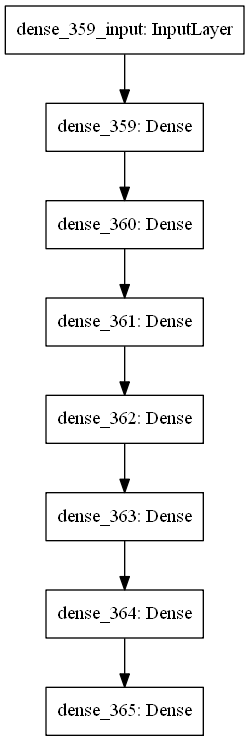

In [56]:
#Также полезны разные утилиты, например utils.plot_model -Converts a Keras model to dot format and save to a file. 
from keras import utils
import pydotplus
from keras.utils.vis_utils import model_to_dot
import pydot
layers = {1: [512,'relu',test_images.shape[1]],2: [512,'relu'],3: [512,'relu'],4: [512,'relu'],
                  5: [512,'relu'],6: [512,'relu'],7:[10,'softmax']}
    
list_keys = list(layers.keys())
list_keys.sort()
model,hist=create_model(train_images, train_labels, test_images,test_labels,layers,list_keys,
                                optimizer_par='adam',loss_par='categorical_crossentropy',metrics_par=['accuracy'],
                                epochs_par=2,batch_size_par=128)

utils.vis_utils.pydot = pydot
utils.plot_model(model, to_file='model.png')

